# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

**What is classification?**

Classification involves deciding whether a sample is part of one class or another (**binary classification**).

If there are multiple class options, it's referred to as **multi-class classification**.

                                     ## 6 Step Machine Learning Modelling Framework
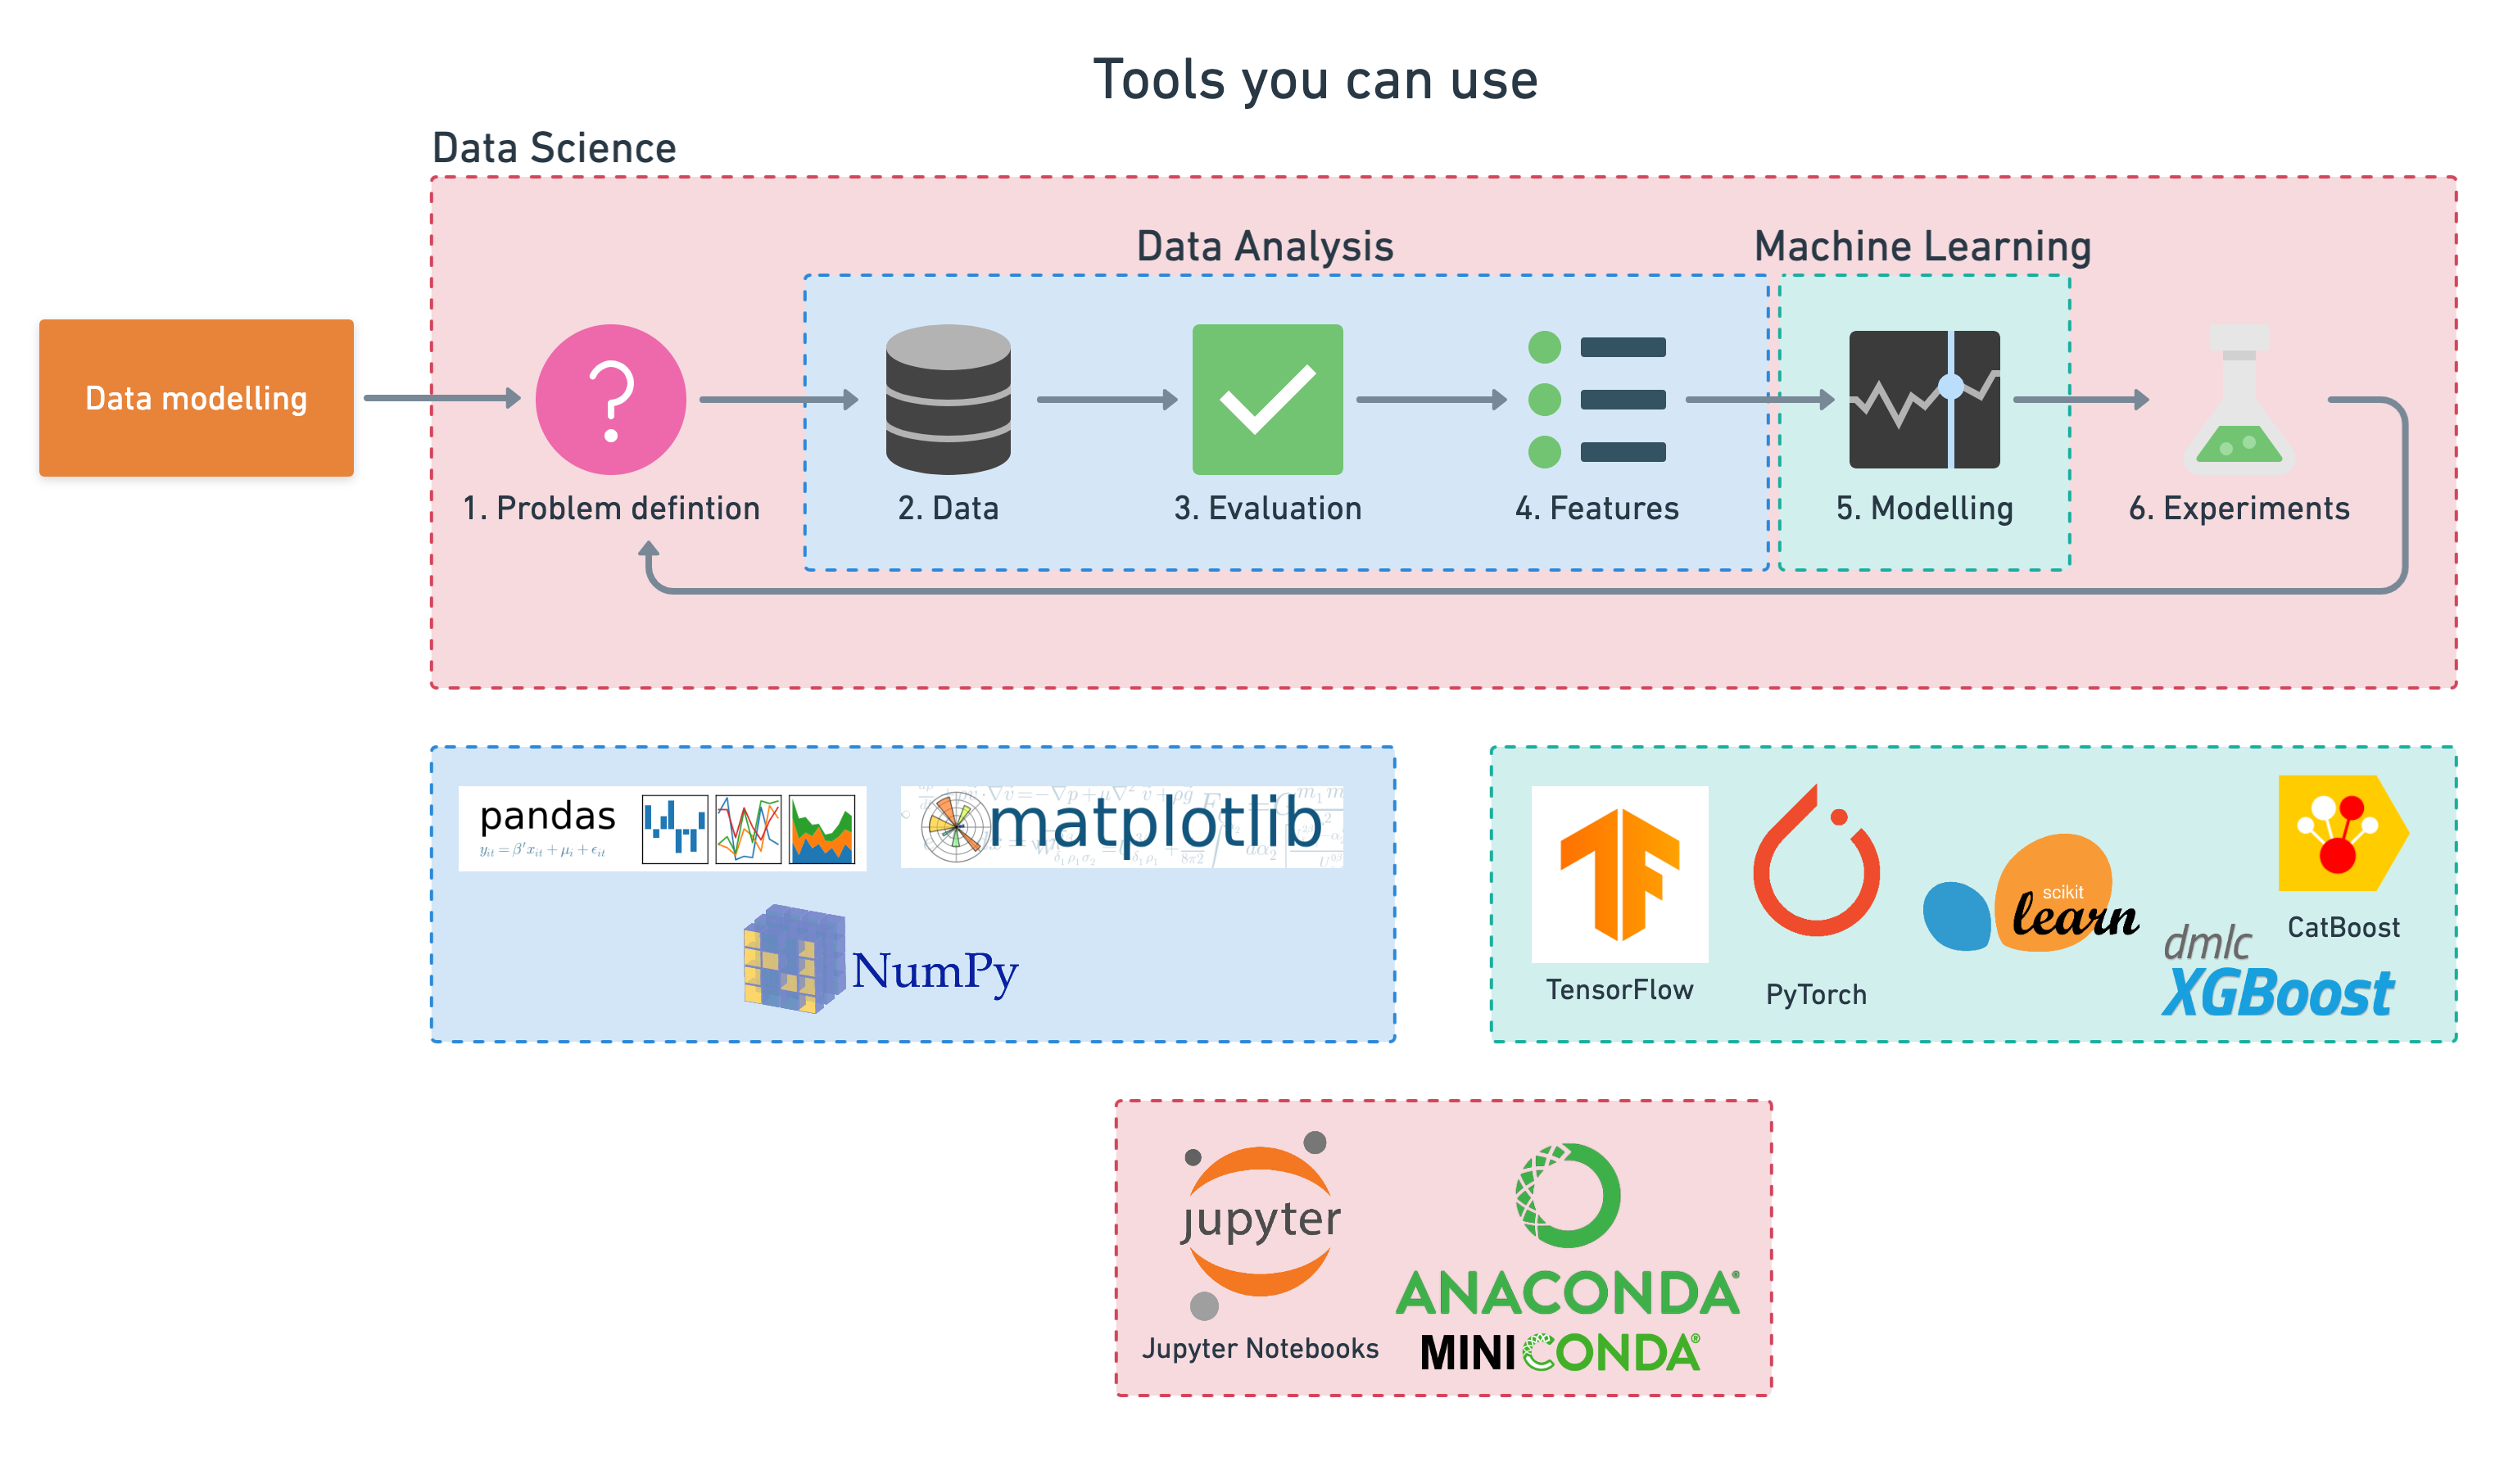

More specifically, we'll look at the following topics.

**Step**	**What we'll cover**

**Exploratory data analysis (EDA)**  	The process of going through a dataset and discovering more about it.

**Model training**	      Create model(s) to learn to predict a target variable based on other variables.

**Model evaluation**	  Evaluating a model's predictions using problem-specific evaluation metrics.

**Model comparison**	  Comparing several different models to find the best one.

**Model hyperparameter tuning**	    Once we've found a good model, can we tweak its hyperparameters to improve it?

**Feature importance**	    Since we're predicting the presence of heart disease, are there some features/characteristics that are more important for prediction?

**Cross-validation**	    If we do build a good model, can we be sure it will work on unseen data?

**Reporting what we've found**	    If we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.


                                      ## Tools which can be used for each step of the machine learning modelling process.
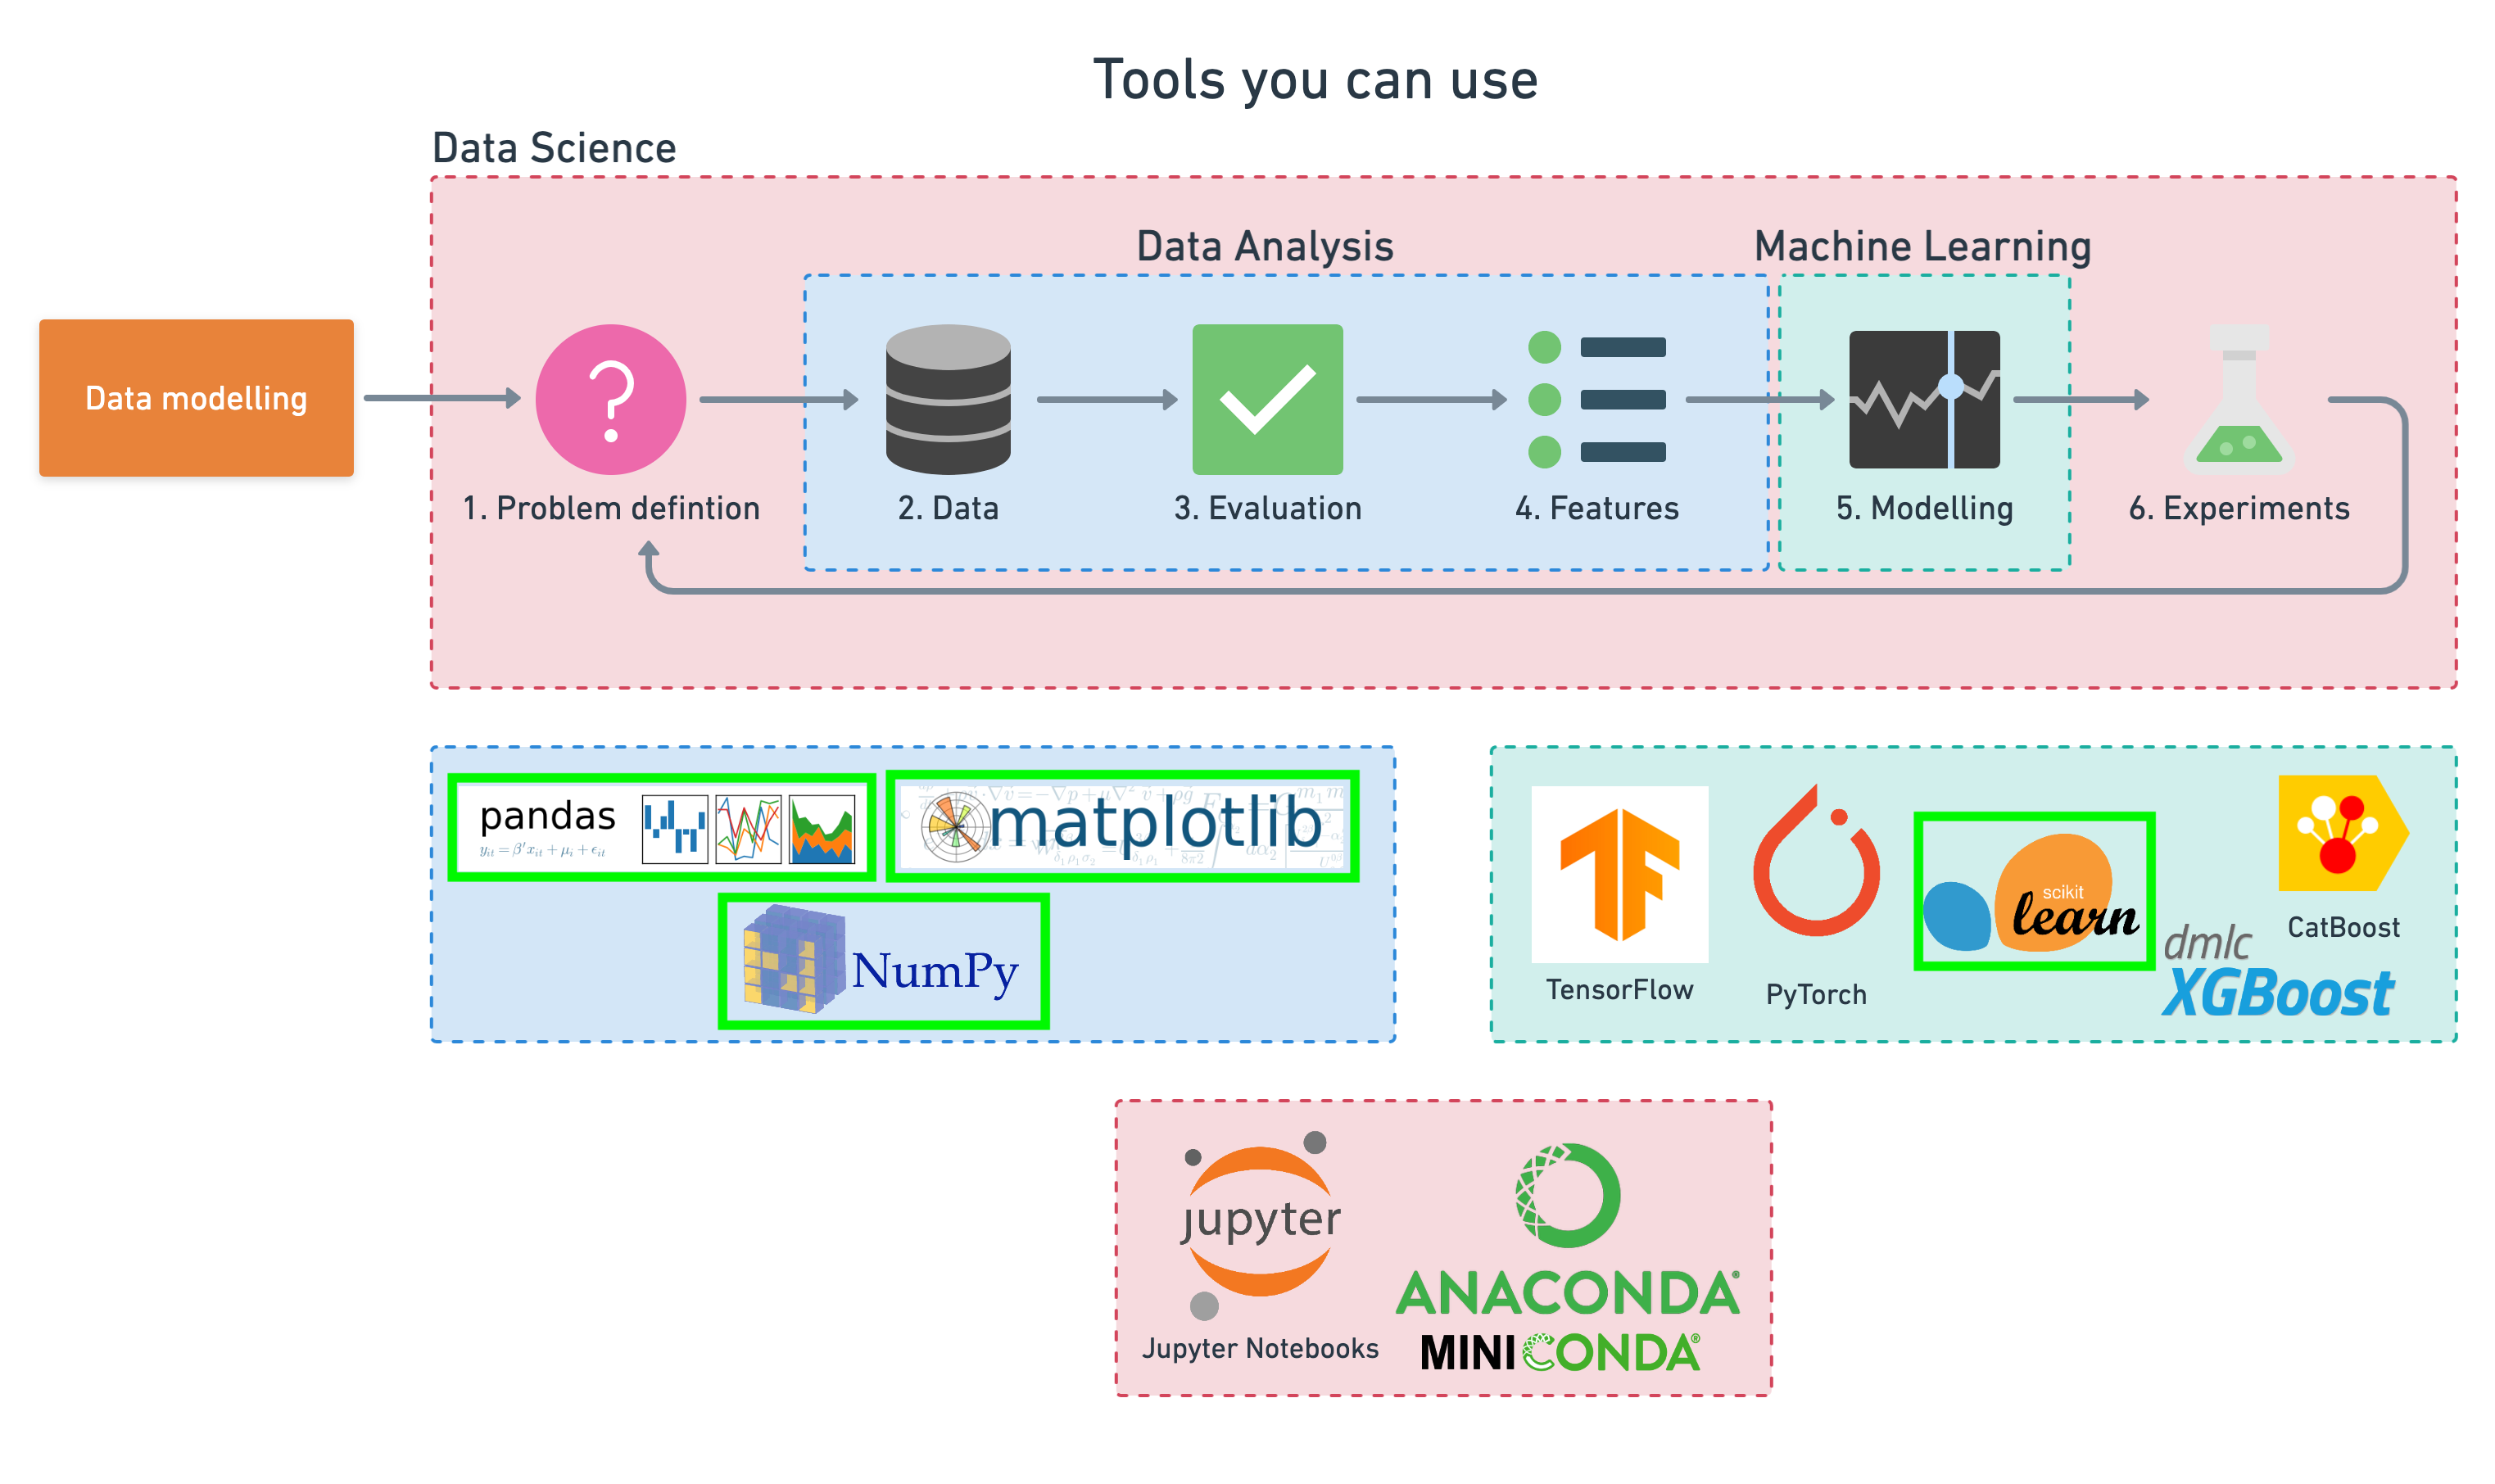


We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

# 1. Going through the 6 step ML framework
## 1.1 Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

This is because we're going to be using a number of differnet **features** (pieces of information such as health characteristics) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 1.2 What data are we using?
What you'll want to do here is dive into the data your problem definition is based on.

This may involve, sourcing data (if it doesn't already exist), defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database (https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle(https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.



  **Note:** We use the independent variable(s)to predict our dependent variable(s).



In our case, the **independent variables** are a patient's different medical attributes and the **dependent variable** is whether or not they have heart disease.

## 1.3 How will we evaluate our model?
An evaluation metric is something you usually define at the start of a project.

However, since machine learning is very experimental, it can change over time.

But to begin a project, you might say something like:

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

Of course, as the project progresses and gets tested in the real world, you may have to adjust this goal/threshold.

## 1.4 Which features of the data will be important to us?
Features are different parts and characteristics of the data.

During this step, you'll want to start exploring what each portion of the data relates to and then create a reference you can use to look up later on.

One of the most common ways to do this is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with.

Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

**Feature**	**Description**	**Example Values**

**age**	Age in years	29, 45, 60

**sex**	1 = male; 0 = female	0, 1

**cp**	Chest pain type	0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal

**spasms** (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)

**trestbps**	Resting blood pressure (in mm Hg on admission to the hospital)	120, 140, 150

**chol**	Serum cholesterol in mg/dl	180, 220, 250

**fbs**	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)	0, 1

**restecg**	Resting electrocardiographic results	0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy

**thalach**	Maximum heart rate achieved	160, 180, 190

**exang**	Exercise induced angina (1 = yes; 0 = no)	0, 1

**oldpeak**	ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest	0.5, 1.0, 2.0

**slope**	The slope of the peak exercise ST segment	0: Upsloping, 1: Flatsloping, 2: Downsloping

**ca**	Number of major vessels (0-3) colored by fluoroscopy	0, 1, 2, 3

**thal**	Thalium stress result	1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect

**target**	Have disease or not (1 = yes; 0 = no)	0, 1



 **Note:** No personal identifiable information (PPI) can be found in the dataset.



It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## 2. Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk (as you can see in the code cell below).

However, in practice, when starting on new projects you may import libraries as you go (because you don't know what you need ahead of time).

After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up.

This is where you may want to consolidate every library you've used at the top of your notebook.

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation

In [1]:
# import all the tools we need
# Regular EDA (Exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### Load Data

In [2]:
df = pd.read_csv("6.1 heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset yo're working with.

1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do we deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

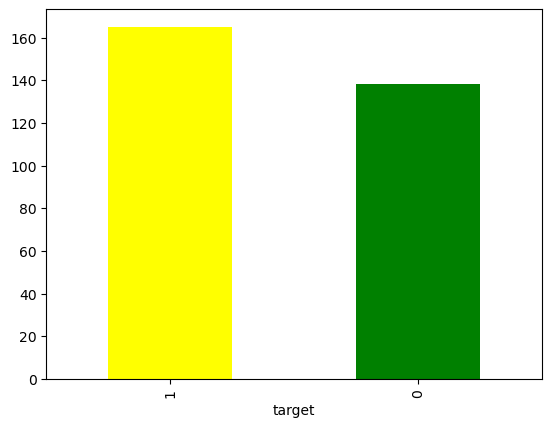

In [7]:
df["target"].value_counts().plot(kind='bar', color=["yellow", "green"])
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


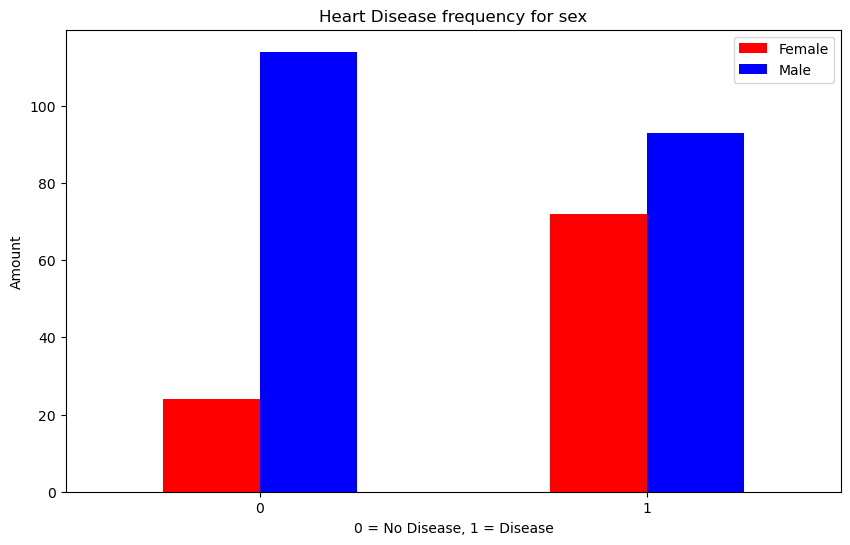

In [15]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["red", "blue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show();

In [22]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs.  Max Heart rate for Heart Disease

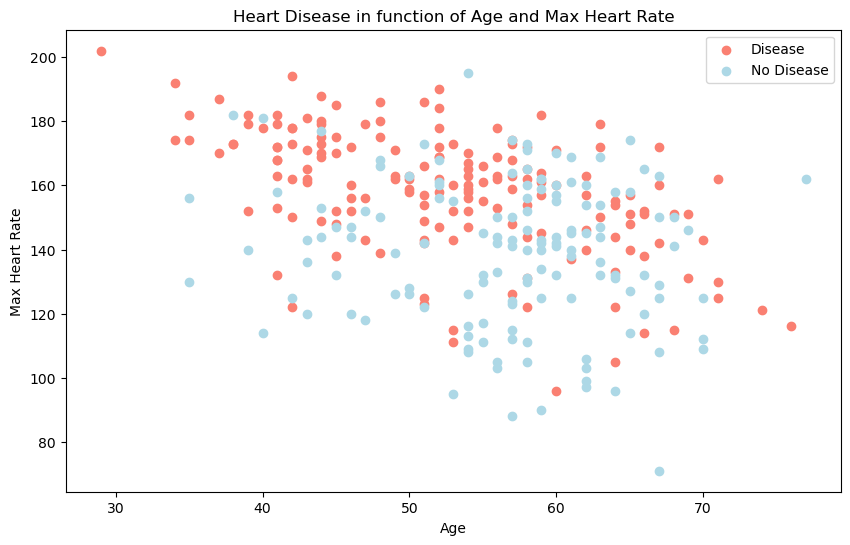

In [26]:
# Create another figure
plt.figure(figsize=(10, 6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")
# scatter with negative examples
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target ==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show();

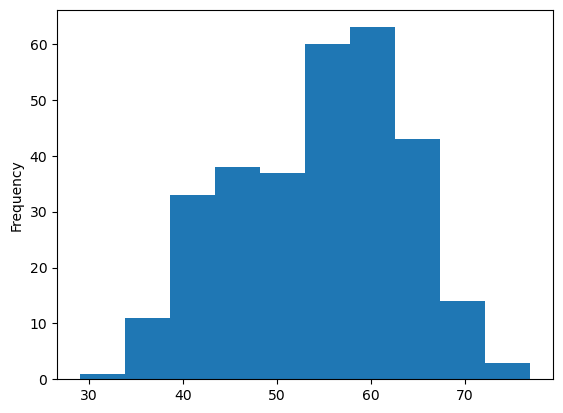

In [27]:
# check the distribution of the age column with histogram
df["age"].plot.hist()
plt.show();

### Heart Disease Frequency per chest Pain Type
cp Chest pain type
0: Typical angina (chest pain)

1: Atypical angina (chest pain not related to heart)

2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)


In [28]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


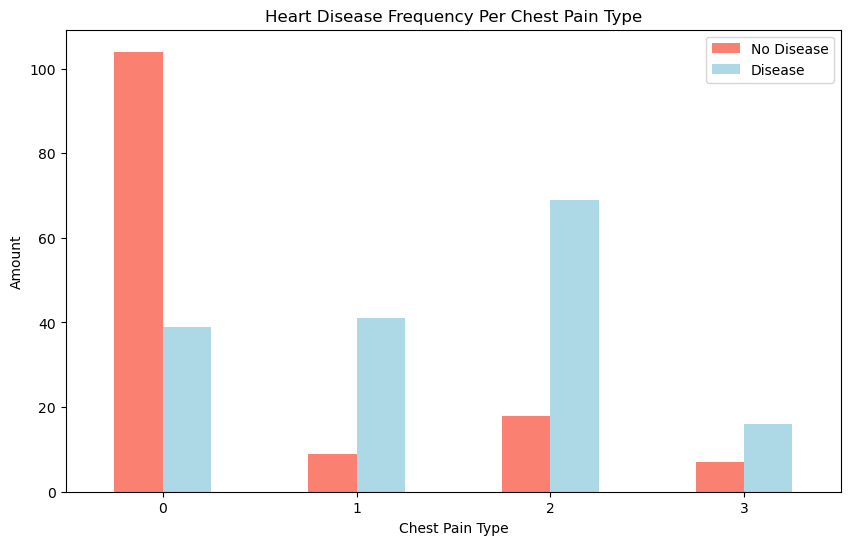

In [29]:
# make a crosstab more visible
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show();

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


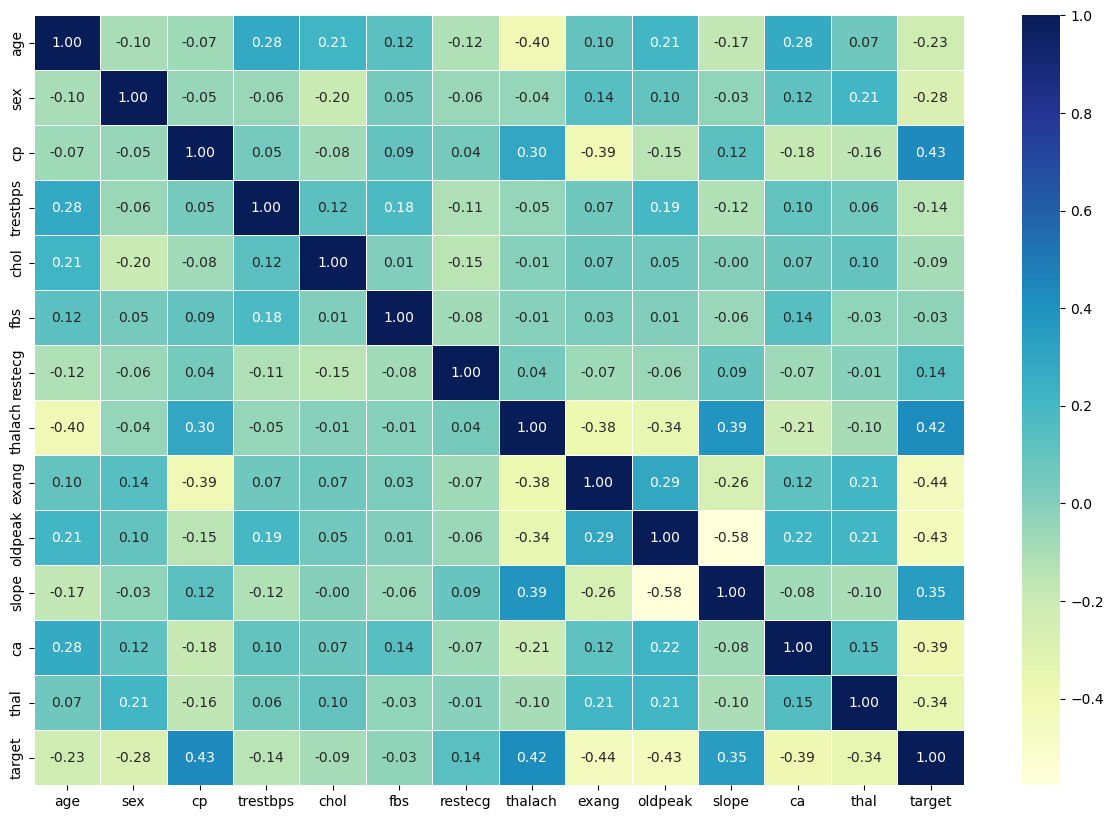

In [38]:
### let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.show();

## 5. Modelling

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
 # split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [41]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [43]:
# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2


In [45]:
y_train, len(y_train)

(16     1
 102    1
 117    1
 260    0
 293    0
       ..
 285    0
 66     1
 226    0
 51     1
 207    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to buld a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models.
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [83]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [84]:
# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models.
    x_train: training data. (no labels)
    x_test: testing data. (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)

        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [88]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7213114754098361,
 'Random Forest': 0.8688524590163934}

### Model Comparison

In [89]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.852459,0.721311,0.868852


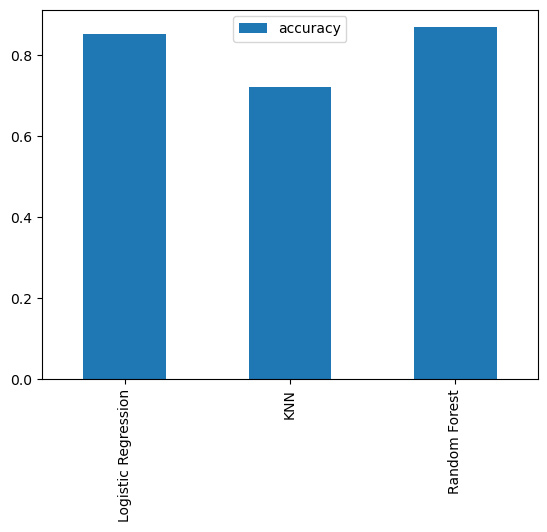

In [90]:
model_compare.T.plot.bar()
plt.show();

Now we've got a baseline model... ans we know a model's first prediction aren't always what we should base our next steps off.What should we do?

Let's look at the following:

**Hyperparameter tuning**

**feature importance**

**confusion matrix**

**cross-validation**

**precision**

**recall**

**f1-score**

**classification report**

**ROC Curve**

**Area under the Curve (AUC)**

### Hyperameter tuning

In [91]:
# let's tune KNN
train_scores = []
test_scores = []

# create a list of different values for n-neighbors
neighbors = range(1, 21)

# setup KNN instance
knn =KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)
  # fit the algorithm
  knn.fit(x_train, y_train)
  # update the training scores list
  train_scores.append(knn.score(x_train, y_train))
  # update the test scores list
  test_scores.append(knn.score(x_test, y_test))

In [92]:
train_scores

[1.0,
 0.78099173553719,
 0.756198347107438,
 0.743801652892562,
 0.7520661157024794,
 0.756198347107438,
 0.71900826446281,
 0.7107438016528925,
 0.6900826446280992,
 0.7066115702479339,
 0.7024793388429752,
 0.6942148760330579,
 0.6776859504132231,
 0.6859504132231405,
 0.6735537190082644,
 0.6694214876033058,
 0.6611570247933884,
 0.6900826446280992,
 0.6570247933884298,
 0.6694214876033058]

In [93]:
test_scores

[0.7377049180327869,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.7377049180327869,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.7213114754098361,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7868852459016393,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869]

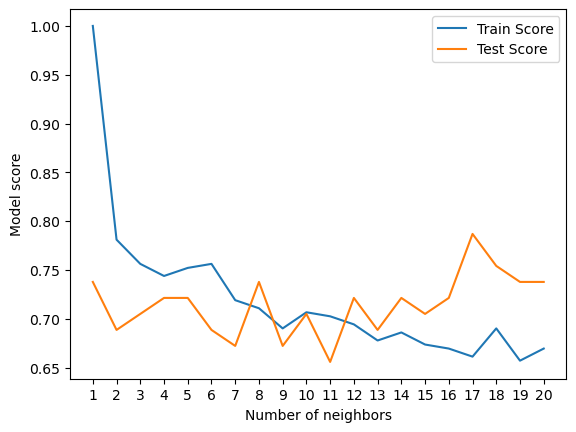

Maximum KNN Score on the test data: 78.69%


In [94]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show();

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning With RandomizedSearchCV

we've going to tune:
* Logistic Regression()
* Random Forest classifier()

... Using Randomized Search cv

In [99]:
# create a hyperparameter grid for logisticregression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

In [105]:
# create a hyperparameter grid for Randomforestclassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 30, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [106]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for logisticregression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [110]:
# find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Now we've tuned logisticregression() let's do the some for randomforestclassifier

In [111]:
# setup a random seed
np.random.seed(42)

# setup random hyperparameter search for randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# fit random hyperparameter search model for randomforestclassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [112]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': None}

## Hyperparameter Tuning with GridSearchCV
since our logisticRegression model provides the test scores so far, we'll try and improve them again using gridsearchcv

In [113]:
# different hyperparameters for our logisticregression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# fit grid hyperparameter search model 
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [114]:
# find the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [115]:
# Evaluate the gridsearch logistic regression model
gs_log_reg.score(x_test, y_test)

0.8524590163934426

In [116]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.852459,0.721311,0.868852


## Evaluating our tuned machine learning classifier, beyond accuracy
* Roc curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [119]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [120]:
y_preds

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [121]:
y_test

126    1
297    0
217    0
147    1
174    0
      ..
176    0
161    1
208    0
61     1
18     1
Name: target, Length: 61, dtype: int64

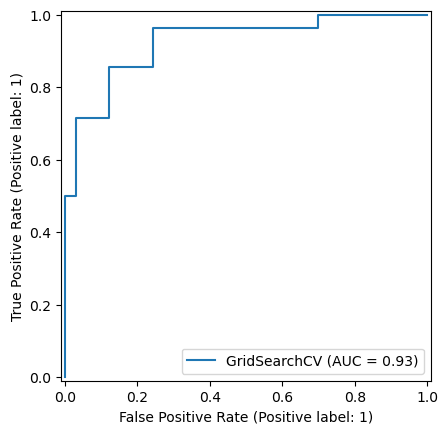

In [129]:
from sklearn.metrics import RocCurveDisplay

# plot Roc curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test) 

plt.show();

In [131]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  8]
 [ 1 27]]


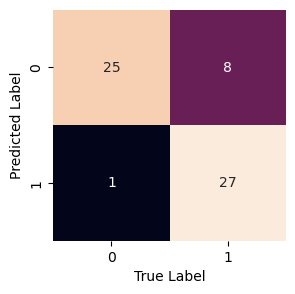

In [135]:
def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)   
plt.show();

Nw we've got a Roc curve, an Auc metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [137]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



### calculate evaluation metrics using cross-validation
we're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so will be using cross_val_score

In [138]:
# check best parameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [140]:
# create a new classifier with best parameters
clf = LogisticRegression(C = 0.38566204211634725,
                         solver = "liblinear")

# cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [141]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [142]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [143]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [144]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

In [146]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.838087,0.815467,0.915152,0.861485


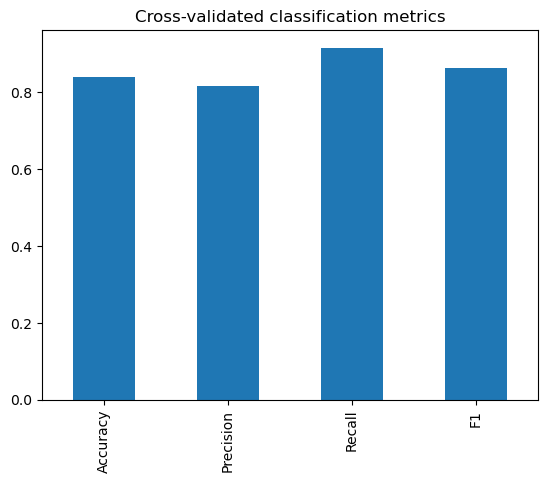

In [149]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                    legend=False)
plt.show();

### Feature Importance
Feature importnce is another asking, "which features contibuted most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model? one way to find feature importance is to search for ("MODEL NAME") feature importance".

Let's find the feature importance for our logistic Regression model...

In [150]:
# fit on instance of logistic Regression
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [151]:
clf = LogisticRegression(C = 0.38566204211634725,
                         solver = 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [152]:
# check coef
clf.coef_

array([[ 0.01641953, -0.99675212,  0.89250576, -0.0186087 , -0.00424287,
         0.14430092,  0.16536851,  0.03130089, -0.50032763, -0.40920705,
         0.34424755, -0.64932072, -0.73044707]])

In [153]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [155]:
# match coef's of  features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.016419533938829983,
 'sex': -0.9967521218892692,
 'cp': 0.8925057558757074,
 'trestbps': -0.018608699942287768,
 'chol': -0.004242870677130692,
 'fbs': 0.14430091535386874,
 'restecg': 0.16536850769506856,
 'thalach': 0.03130089043659528,
 'exang': -0.500327632950641,
 'oldpeak': -0.4092070460610166,
 'slope': 0.34424755222606174,
 'ca': -0.6493207165157869,
 'thal': -0.7304470677344767}

In [156]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.01642,-0.996752,0.892506,-0.018609,-0.004243,0.144301,0.165369,0.031301,-0.500328,-0.409207,0.344248,-0.649321,-0.730447


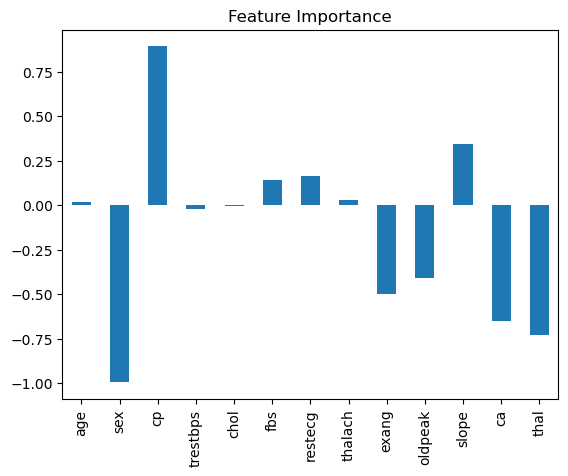

In [157]:
feature_df.T.plot.bar(title="Feature Importance",
                     legend=False)
plt.show();

In [158]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [159]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope The slope of the peak exercise ST segment
* 0: Upsloping 
* 1: Flatsloping 
* 2: Downsloping

## 6. Experimentation

if you haven't hit your evaluation metric yet... ask yourself...

* could you collect more data?
* could you try a better model? like catBoost or XGBoost?
* could you improve the current models? (beyond what we've done so far)
* if your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

In [161]:
!pip freeze > requirements.txt

In [163]:
!type requirements.txt

anyio @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_anyio_1742243108/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1733311059102/work
argon2-cffi-bindings @ file:///D:/bld/argon2-cffi-bindings_1725356700772/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1733584251875/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1733250440834/work
async-lru @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_async-lru_1742153708/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1741918516150/work
babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1738490167835/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1744783198182/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_bleach_1737382993/work
Brotli @ file:///D:/bld/brotli-split_1725267609074/work
cached-property @ file:///

In [164]:
from IPython.display import FileLink
FileLink('requirements.txt')

C:\Users\hp\Desktop\ml-course\heart-disease-project\requirements.txt